In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy  as np
import pandas as pd
from typing import NamedTuple

#Площадь под кривой с известными точками

In [129]:
def area_under_curve(x_arr, y_arr) -> float:

  area = 0

  for i in range(len(x_arr) - 1):
    area += np.abs((y_arr[i] + y_arr[i+1])*(x_arr[i+1] - x_arr[i])/2.)

  return area    


#ROC-кривая

In [12]:
class Confusions(NamedTuple):
  fp: int
  tp: int
  tn: int
  fn: int

In [53]:
def _classify(predictions: float, treshold: float) -> list:

  prediction = []

  for i in range(len(predictions)):
    if predictions[i] < treshold:
      prediction.append(0)
    else:
      prediction.append(1)

  return prediction

In [62]:
def _get_confusions(predictions, y_test) -> Confusions:
  
  tp, fp, tn, fn = 0, 0, 0, 0

  # print(predictions)
  # print(y_test)

  for i in range(len(y_test)):
    if y_test[i] == 1 and predictions[i] == 1:
      tp += 1
    elif y_test[i] == 0 and predictions[i] == 1:
      fp += 1
    elif y_test[i] == 1 and predictions[i] == 0:
      fn += 1
    elif y_test[i] == 0 and predictions[i] == 0:
      tn += 1

  return Confusions(fp=fp, tp=tp, fn=fn, tn=tn)

In [99]:
def _get_tpr_fpr(predictions: np.array, y_test: np.array):

  #получаем кол-во правильных и ложных значений
  confusions = _get_confusions(predictions, y_test)
  # print(confusions)

  tpr = float(confusions.tp)/float(confusions.tp + confusions.fn)

  fpr = float(confusions.fp)/float(confusions.fp + confusions.tn)


  return tpr, fpr

In [103]:
def _draw_curve(x_arr, y_arr, name) -> None:
  plt.plot(x_arr, y_arr, label='ROC', color='red')
  plt.title(name)
  plt.legend('best')
  plt.show()

\
$TPR=\frac{TP}{TP+FN}$

$FPR=\frac{FP}{FP+TN}$

In [125]:
def roc_curve(x_test: np.array, y_test: np.array, model, n: int) -> None:

  tprs, fprs = [], []

  #получаем пороги
  treshold = np.linspace(0., 1., n)  
  # print(treshold)

  #возращает массив вероятностей приналежности для каждого класса
  predictions = model.predict_proba(x_test)[:,1]

  for i in range(n):
    # print(treshold[i])
    prediction = _classify(predictions, treshold=treshold[i])
    tpr, fpr = _get_tpr_fpr(prediction, y_test)
    tprs.append(tpr)
    fprs.append(fpr)

  _draw_curve(x_arr=fprs, y_arr=tprs, name='ROC-curve')

  area = area_under_curve(x_arr=fprs, y_arr=tprs)
  print(f'Площадь под кривой равна:    {area}')

#PR - кривая (Precision Recall)

\
$recall = \frac{TP}{TP + FN}$ 

$precision= \frac{TP}{TP+FP}$

In [113]:
def _calc_recall_precision(predictions: np.array, y_test: np.array) -> list:

  #получаем кол-во правильных и ложных значений
  confusions = _get_confusions(predictions, y_test)

  recall = float(confusions.tp)/float(confusions.tp + confusions.fn)

  if(confusions.tp + confusions.fp) == 0:
    
    precision = 0
  else:
    precision = float(confusions.tp)/float(confusions.tp + confusions.fp)

  return recall, precision

In [130]:
def pr_curve(x_test: np.array, y_test: np.array, model, n:int)->None:
  recalls, precisions = [], []

  #получаем пороги
  treshold = np.linspace(0., 1., n)

  #возращает массив вероятностей приналежности для каждого класса
  predictions = model.predict_proba(x_test)[:,1]

  for i in range(n):
    prediction = _classify(predictions, treshold=treshold[i])
    recall, precision = _calc_recall_precision(prediction, y_test)
    recalls.append(recall)
    precisions.append(precision)

  _draw_curve(x_arr = recalls, y_arr = precisions, name = 'PR-curve')

  area = area_under_curve(x_arr=recalls, y_arr=precisions)
  print(f'Площадь под кривой равна:    {area}')

#Генерируем данные

In [100]:
np.random.seed(0)
l = 300
n = 2

X1 = np.array([[-1, -1]]) + 1.5*np.random.randn(l, n)
X2 = np.array([[1, 1]]) + 1.5*np.random.randn(l, n)

#конкатенируем все в одну матрицу
x_test = np.vstack((X1[:100], X2[:100]))
x_train = np.vstack((X1[100:], X2[100:]))

#конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
y_test = np.hstack([[0]*100, [1]*100])
y_train = np.hstack([[0]*(l-100), [1]*(l-100)])

#Создаем модель и тренируем

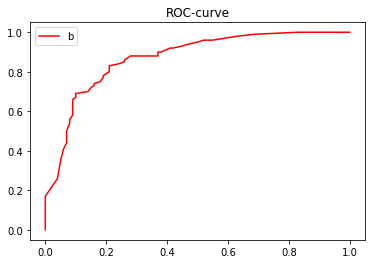

Площадь под кривой равна:    0.8704500000000002


In [131]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

roc_curve(x_test, y_test, model = lgr, n = 50)

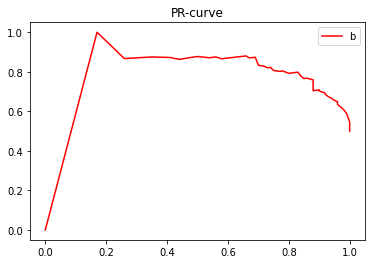

Площадь под кривой равна:    0.7749093523307853


In [132]:
pr_curve(x_test, y_test, lgr, n = 50)